In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from os import listdir
import re

In [2]:
# get all file names
path = '2-hands'
files = [f for f in listdir(path) if f[-4:]=='.png']
# load one to get the dimensions
image = mpimg.imread(f'{path}/{files[0]}')
# get dimensions
shape = list(image.shape)
# remove alpha if necessary
if (shape[2]==4):
    shape[2] = 3
n = len(files)

In [3]:
y = np.zeros(shape=(n,2),dtype=int)
X = np.zeros(shape=(n,*shape))
for i in range(len(files)):
    # get the hour from the file name
    y[i,0] = re.search('^([0-9]*)_([0-9]*)',files[i])[1]
    y[i,1] = re.search('^([0-9]*)_([0-9]*)',files[i])[2]
    # get the pixels, remove the alpha if needed and convert to 0-255
    X[i] = (mpimg.imread(f'{path}/{files[i]}')[:,:,:shape[2]] )

In [4]:
# transform y to label encoded
temp = y.copy()
y = np.zeros(shape=(n,24),dtype=int)
for i in range(n):
    # hours, 0 to 11 for 1 to 12
    h = temp[i,0] -1
    # minutes 12 to 23 for 0 to 55
    m = temp[i,1]//5 + 12
    y[i,h] = 1
    y[i,m] = 1

8_50_clock_3735.png
8 50
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


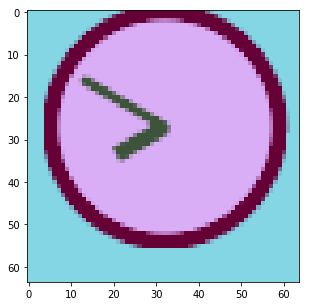

In [5]:
i = np.random.randint(0,n)
print(files[i])
print(temp[i,0],temp[i,1])
print(y[i])
plt.figure(figsize=(5,5))
plt.imshow(X[i])
plt.show()

In [6]:
c  = 4000
X_train = X[:c]
y_train = y[:c]

X_test = X[c:]
y_test = y[c:]

In [7]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


In [9]:
input_layer = Input(shape=shape)
conv1 = Convolution2D(64, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(256,activation='relu')(Flatten()(pool))
drop = Dropout(0.5)(hidden)
output1 = Dense(12, activation='softmax')(drop)
output2 = Dense(12, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=[output1, output2])
model.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy'], loss_weights=[1., 0.8])

In [10]:
model.fit(X_train, [y_train[:,:12],y_train[:,12:]],
          epochs=10,
          batch_size=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4000/4000 [==============================] - 92s 23ms/step - loss: 4.4552 - dense_5_loss: 2.4843 - dense_6_loss: 2.4637 - dense_5_acc: 0.1027 - dense_6_acc: 0.1310
Epoch 2/10
4000/4000 [==============================] - 92s 23ms/step - loss: 3.5585 - dense_5_loss: 2.2531 - dense_6_loss: 1.6318 - dense_5_acc: 0.2102 - dense_6_acc: 0.4552
Epoch 3/10
4000/4000 [==============================] - 97s 24ms/step - loss: 2.8151 - dense_5_loss: 1.9897 - dense_6_loss: 1.0318 - dense_5_acc: 0.2840 - dense_6_acc: 0.6468
Epoch 4/10
4000/4000 [==============================] - 91s 23ms/step - loss: 2.3104 - dense_5_loss: 1.6931 - dense_6_loss: 0.7717 - dense_5_acc: 0.3983 - dense_6_acc: 0.7300
Epoch 5/10
4000/4000 [==============================] - 94s 24ms/step - loss: 1.8290 - dense_5_loss: 1.3720 - dense_6_loss: 0.5713 - dense_5_acc: 0.5065 - dense_6_acc: 0.7955
Epoch 6/10
4000/4000 [==============================] - 98s 25ms/step - loss:

In [11]:
model.evaluate(X_test, [y_test[:,:12],y_test[:,12:]], batch_size=25)

1000/1000 [==============================] - 5s 5ms/step


[1.3109164461493492,
 1.062222807109356,
 0.3108670447021723,
 0.6400000028312206,
 0.8939999952912331]